<a href="https://colab.research.google.com/github/ABHI20-STAT/Fractal_and_Research/blob/main/Control_and_Synchronization_with_Complex_Perturbations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

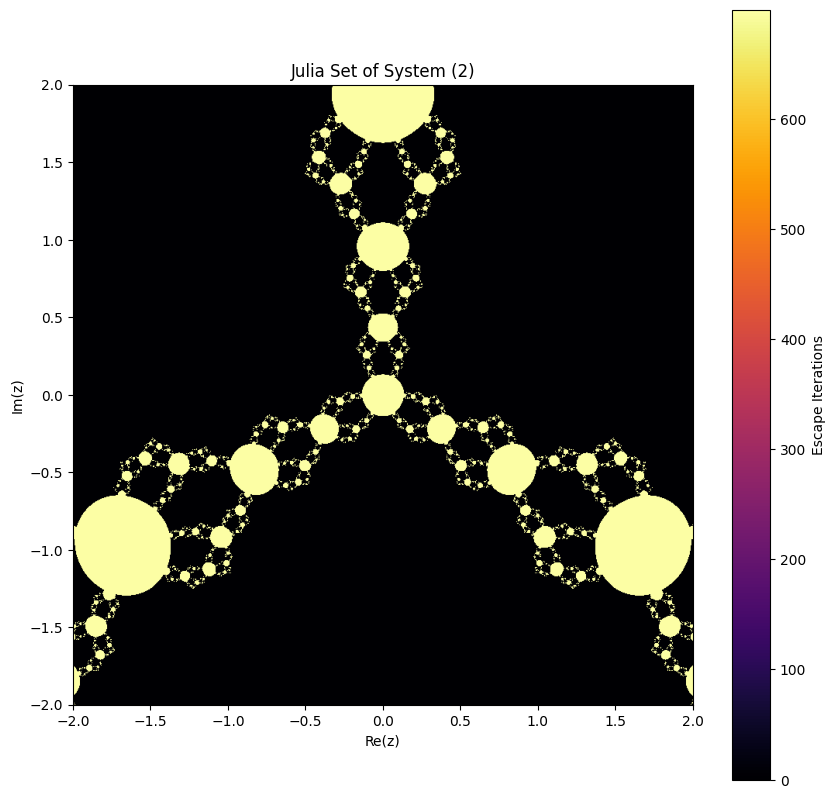

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rational map for the system
def julia_map(z, lambda_val, q):
    return 0.5 * (z + lambda_val / z**q)

# Escape-time algorithm for Julia set visualization
def escape_time_system2(width, height, x_range, y_range, max_iter, lambda_val, q):
    x_min, x_max = x_range
    y_min, y_max = y_range
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    Z = x[np.newaxis, :] + 1j * y[:, np.newaxis]

    escape_times = np.zeros(Z.shape, dtype=int)
    mask = np.full(Z.shape, True, dtype=bool)

    for i in range(max_iter):
        Z[mask] = julia_map(Z[mask], lambda_val, q)
        mask = mask & (np.abs(Z) <= 2)  # Points that have not escaped
        escape_times[~mask] = i

    return escape_times

# Visualization of the Julia set
def plot_julia_set(escape_times, x_range, y_range):
    plt.figure(figsize=(10, 10))
    plt.imshow(escape_times, extent=(*x_range, *y_range), cmap='inferno', origin='lower')
    plt.colorbar(label="Escape Iterations")
    plt.title("Julia Set of System (2)")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.show()

# Parameters for visualization
width, height = 800, 800
x_range, y_range = (-2, 2), (-2, 2)
max_iter = 700
lambda_val = 0.073j
q = 2

# Generate and plot the Julia set
escape_times = escape_time_system2(width, height, x_range, y_range, max_iter, lambda_val, q)
plot_julia_set(escape_times, x_range, y_range)


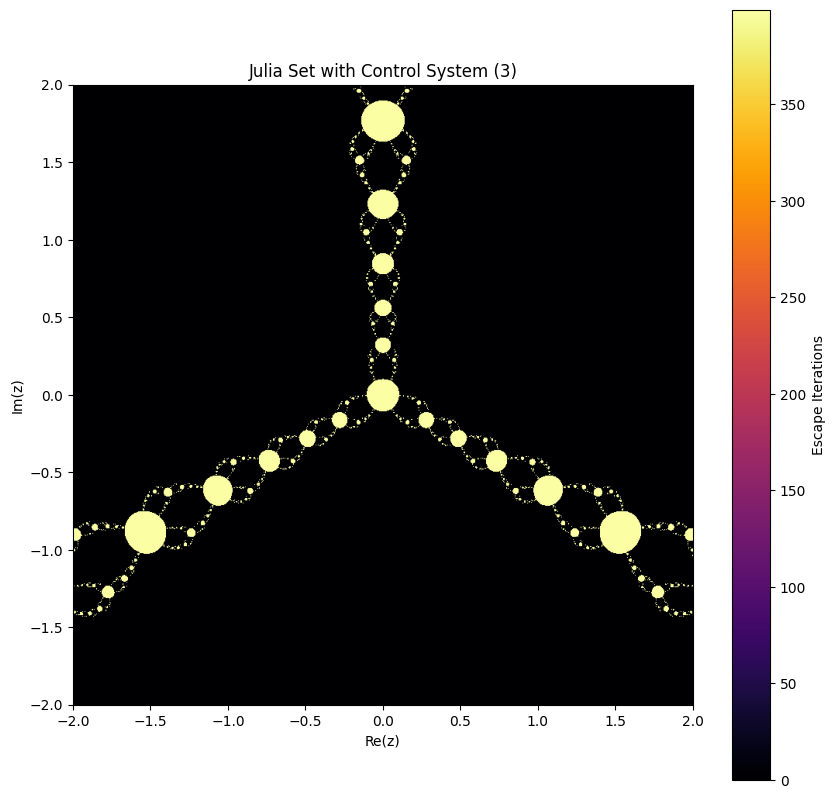

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the rational map
def julia_map(z, lambda_val, q):
    return 0.5 * (z + lambda_val / z**q)

# Define the controlled system
def controlled_map(z, lambda_val, q, k):
    base = julia_map(z, lambda_val, q)
    return base - k * (base - z)

# Escape-time algorithm
def escape_time(width, height, x_range, y_range, max_iter, lambda_val, q, k):
    # Set up the grid
    x_min, x_max = x_range
    y_min, y_max = y_range
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    Z = x[np.newaxis, :] + 1j * y[:, np.newaxis]

    # Initialize iteration counts
    escape_times = np.zeros(Z.shape, dtype=int)
    mask = np.full(Z.shape, True, dtype=bool)

    for i in range(max_iter):
        Z[mask] = controlled_map(Z[mask], lambda_val, q, k)
        mask = mask & (np.abs(Z) <= 2)  # Points that have not escaped
        escape_times[~mask] = i

    return escape_times

# Plot the Julia set
def plot_julia(escape_times, x_range, y_range):
    plt.figure(figsize=(10, 10))
    plt.imshow(escape_times,
               extent=(*x_range, *y_range),
               cmap='inferno', origin='lower')
    plt.colorbar(label="Escape Iterations")
    plt.title("Julia Set with Control System (3)")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.show()

# Parameters
width = 800
height = 800
x_range = (-2, 2)
y_range = (-2, 2)
max_iter = 400
lambda_val = 0.073j
q = 2
k = 0.4  # Control parameter

# Generate the Julia set
escape_times = escape_time(width, height,
                           x_range, y_range,
                           max_iter, lambda_val,
                           q, k)

# Plot the result
plot_julia(escape_times, x_range, y_range)


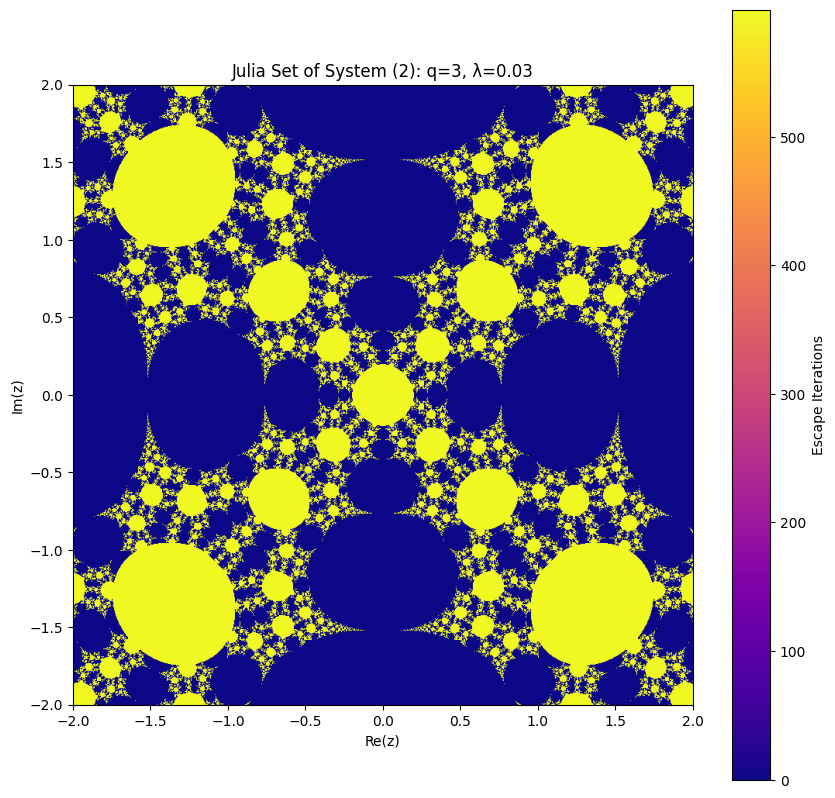

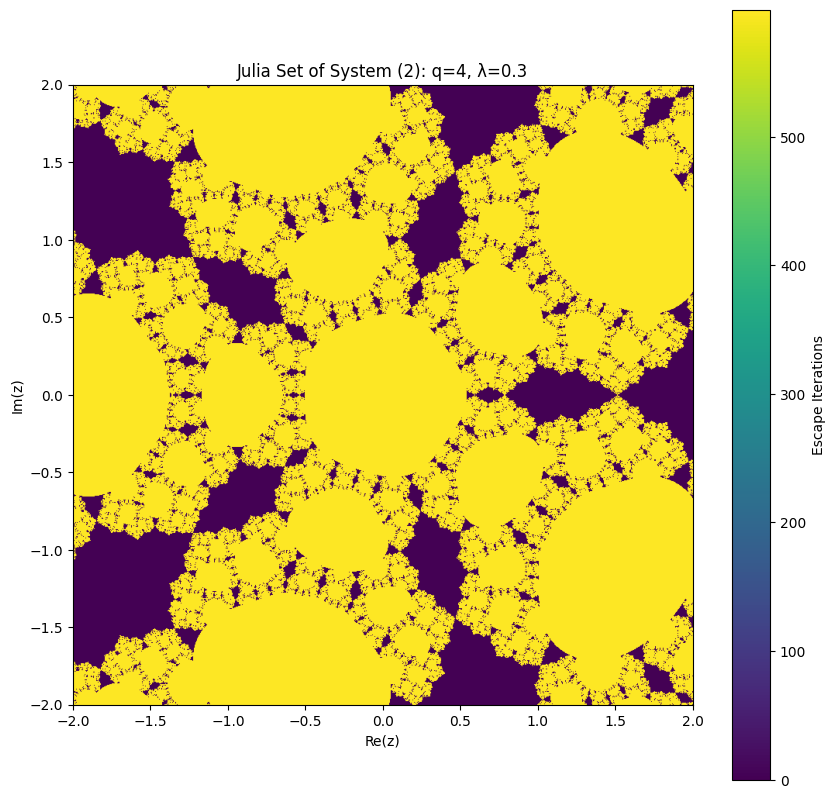

In [3]:
# Define the escape-time algorithm for Julia sets of System (2)
def escape_time_system2_custom(width, height, x_range, y_range,
                               max_iter, lambda_val, q):
    x_min, x_max = x_range
    y_min, y_max = y_range
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    Z = x[np.newaxis, :] + 1j * y[:, np.newaxis]

    escape_times = np.zeros(Z.shape, dtype=int)
    mask = np.full(Z.shape, True, dtype=bool)

    for i in range(max_iter):
        Z[mask] = julia_map(Z[mask], lambda_val, q)
        mask = mask & (np.abs(Z) <= 2)  # Points that have not escaped
        escape_times[~mask] = i

    return escape_times

# Visualization for custom color palette
def plot_julia_set_custom(escape_times,
                          x_range, y_range,
                          title, cmap):
    plt.figure(figsize=(10, 10))
    plt.imshow(escape_times,
               extent=(*x_range, *y_range),
               cmap=cmap, origin='lower')
    plt.colorbar(label="Escape Iterations")
    plt.title(title)
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.show()

# Parameters for the two systems
width, height = 800, 800
x_range, y_range = (-2, 2), (-2, 2)
max_iter = 600

# Parameters for system (a): q=3, λ=0.03
q_a = 3
lambda_a = 0.03

# Parameters for system (b): q=4, λ=0.3
q_b = 4
lambda_b = 0.3

# Generate and visualize Julia sets for both systems
escape_times_a = escape_time_system2_custom(width,
                                            height, x_range, y_range,
                                            max_iter, lambda_a, q_a)
plot_julia_set_custom(escape_times_a,
                      x_range,
                      y_range, "Julia Set of System (2): q=3, λ=0.03",
                      cmap="plasma")

escape_times_b = escape_time_system2_custom(width, height,
                                            x_range, y_range,
                                            max_iter, lambda_b, q_b)
plot_julia_set_custom(escape_times_b, x_range,
                      y_range, "Julia Set of System (2): q=4, λ=0.3",
                      cmap="viridis")


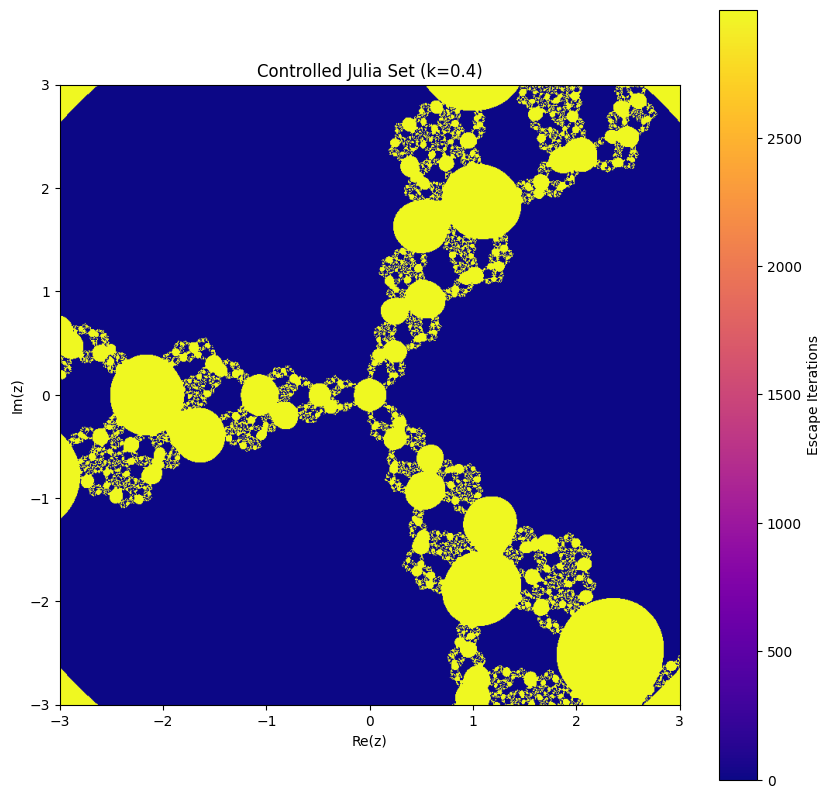

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for System (10)
def controlled_julia_system(z, w, lambda_val, mu, q, p, k):
    # Julia Map for z
    z_next = 0.5 * (z + lambda_val / z**q)
    # Julia Map for w
    w_next = 0.5 * (w + mu / w**p)
    # Controlled synchronization
    z_next = z_next - k * (z_next - w_next)
    return z_next, w_next

# Escape-time algorithm for Controlled Julia Set
def controlled_escape_time(width, height, x_range, y_range, max_iter,
                           lambda_val, mu, q, p, k):
    # Set up the grid for z and w
    x_min, x_max = x_range
    y_min, y_max = y_range
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    Z = x[np.newaxis, :] + 1j * y[:, np.newaxis]
    W = np.copy(Z)  # Start with identical grid for w

    # Initialize escape times
    escape_times = np.zeros(Z.shape, dtype=int)
    mask = np.full(Z.shape, True, dtype=bool)

    for i in range(max_iter):
        Z[mask], W[mask] = controlled_julia_system(Z[mask],
                                         W[mask], lambda_val, mu, q, p, k)
        mask = mask & (np.abs(Z) <= 2) & (np.abs(W) <= 2)  # Points that have not escaped
        escape_times[~mask] = i

    return escape_times

# Plot the Controlled Julia Set
def plot_controlled_julia(escape_times, x_range, y_range, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(escape_times, extent=(*x_range, *y_range),
               cmap='plasma', origin='lower')
    plt.colorbar(label="Escape Iterations")
    plt.title(title)
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.show()

# Parameters for visualization
width = 800
height = 800
x_range = (-3, 3)
y_range = (-3, 3)
max_iter = 3000

# System Parameters for Visualization
lambda_val = 0.073j
mu = 0.1  # Adjust based on the paper's description
q, p = 2, 2  # Degrees of rational maps
k_values = [0.4]  # Control parameters

# Generate and plot Julia Sets for different k values
for k in k_values:
    escape_times = controlled_escape_time(width, height,
                                          x_range, y_range,
                                          max_iter, lambda_val, mu, q, p, k)
    plot_controlled_julia(escape_times, x_range,
                          y_range, f"Controlled Julia Set (k={k})")


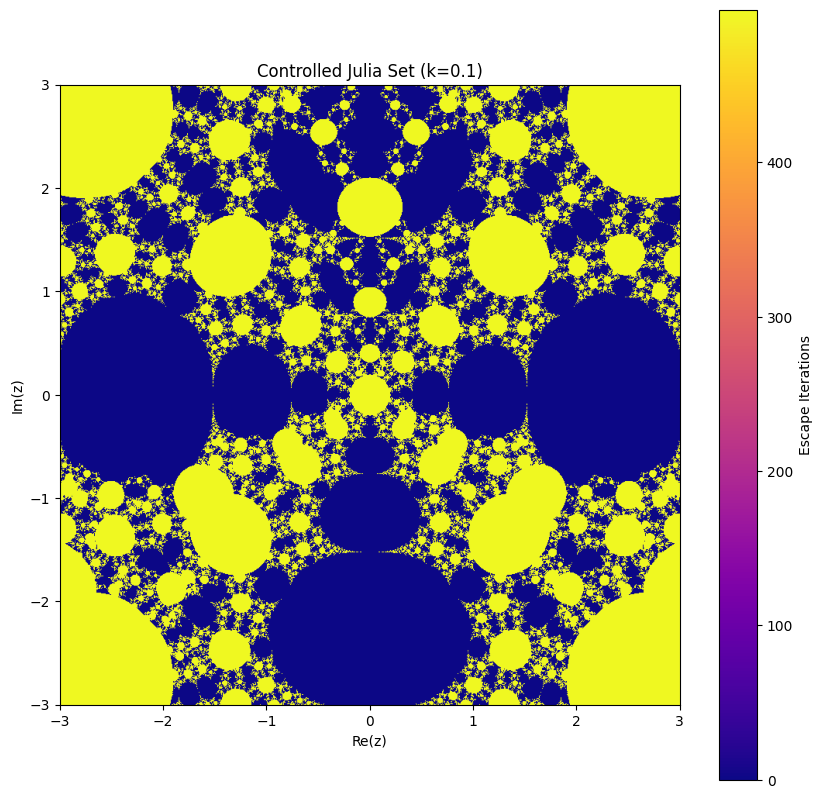

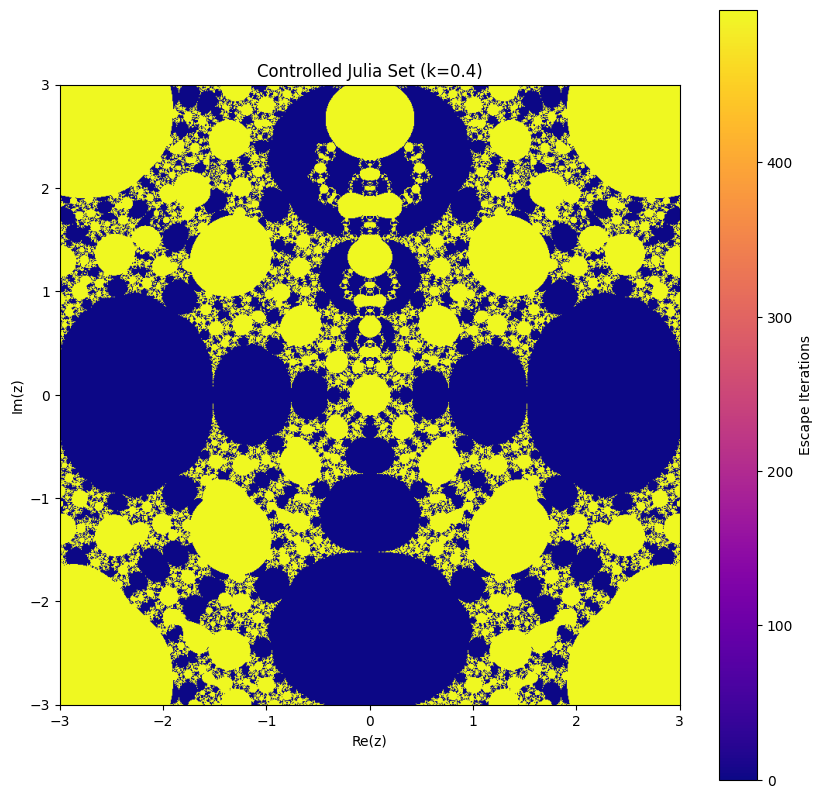

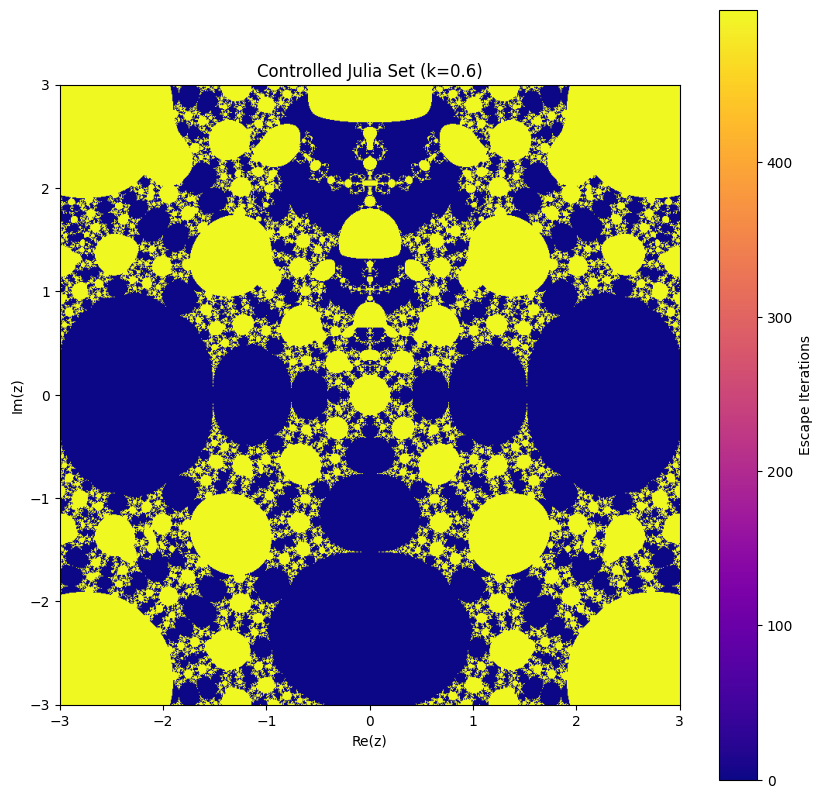

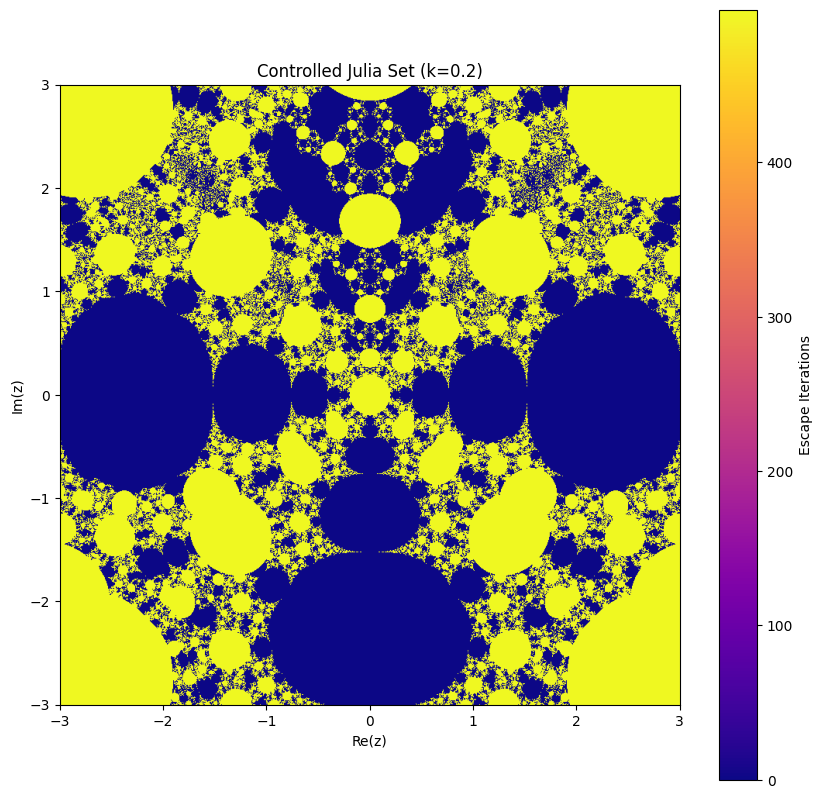

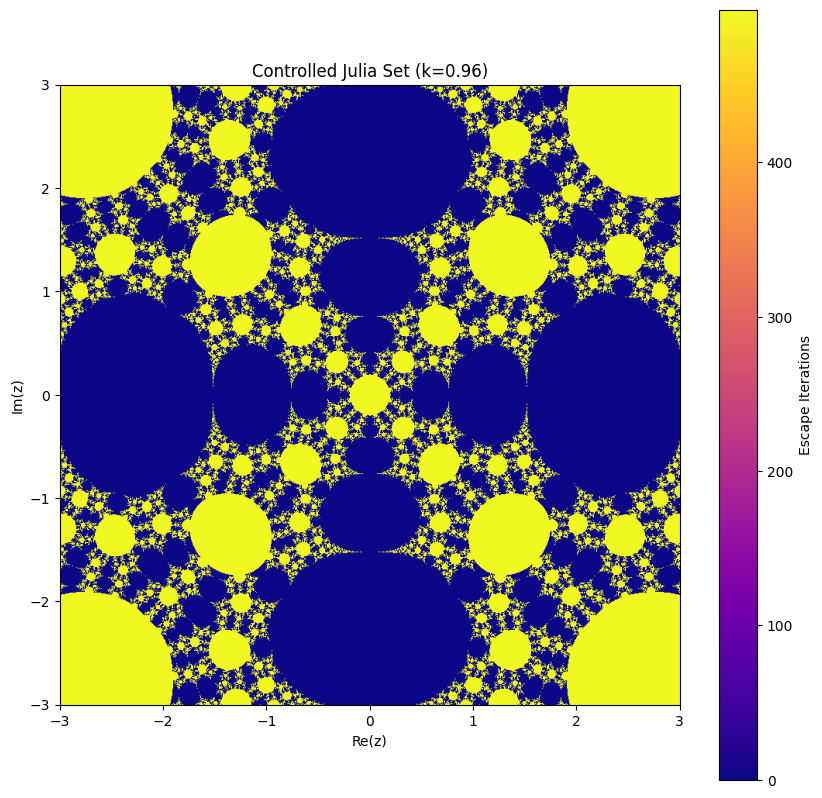

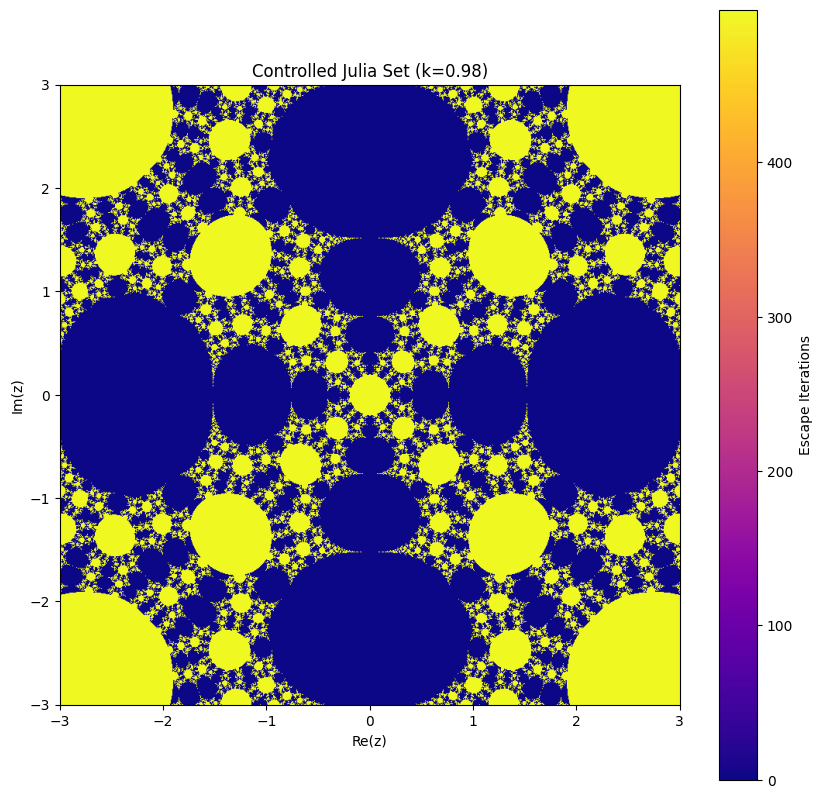

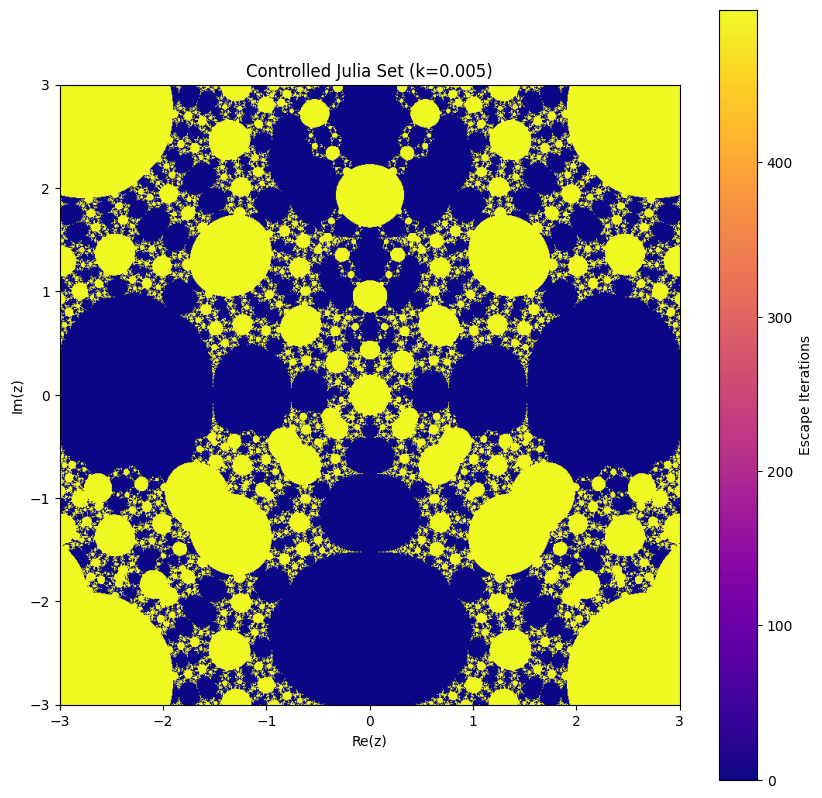

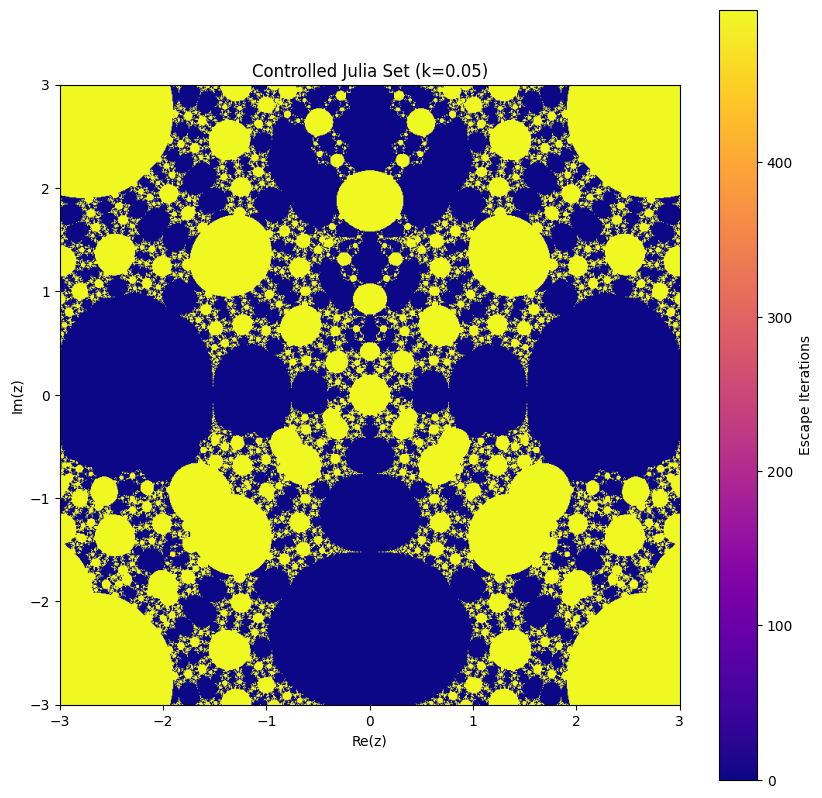

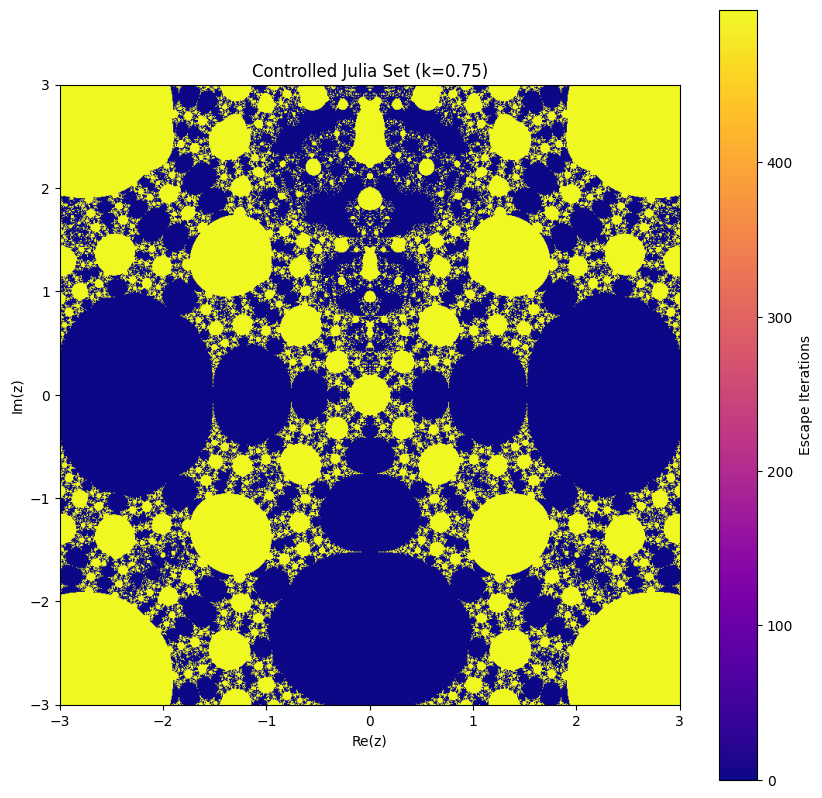

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for System (10)
def controlled_julia_system(z, w, lambda_val, mu, q, p, k):
    # Julia Map for z
    z_next = 0.5 * (z + lambda_val / z**q)
    # Julia Map for w
    w_next = 0.5 * (w + mu / w**p)
    # Controlled synchronization
    z_next = z_next - k * (z_next - w_next)
    return z_next, w_next

# Escape-time algorithm for Controlled Julia Set
def controlled_escape_time(width, height, x_range, y_range, max_iter,
                           lambda_val, mu, q, p, k):
    # Set up the grid for z and w
    x_min, x_max = x_range
    y_min, y_max = y_range
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    Z = x[np.newaxis, :] + 1j * y[:, np.newaxis]
    W = np.copy(Z)  # Start with identical grid for w

    # Initialize escape times
    escape_times = np.zeros(Z.shape, dtype=int)
    mask = np.full(Z.shape, True, dtype=bool)

    for i in range(max_iter):
        Z[mask], W[mask] = controlled_julia_system(Z[mask],
                                         W[mask], lambda_val, mu, q, p, k)
        mask = mask & (np.abs(Z) <= 2) & (np.abs(W) <= 2)  # Points that have not escaped
        escape_times[~mask] = i

    return escape_times

# Plot the Controlled Julia Set
def plot_controlled_julia(escape_times, x_range, y_range, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(escape_times, extent=(*x_range, *y_range),
               cmap='plasma', origin='lower')
    plt.colorbar(label="Escape Iterations")
    plt.title(title)
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.show()

# Parameters for visualization
width = 800
height = 800
x_range = (-3, 3)
y_range = (-3, 3)
max_iter = 500

# System Parameters for Visualization
lambda_val = 0.073j
mu = 0.03  # Adjust based on the paper's description
q, p = 2, 3  # Degrees of rational maps
k_values = [0.1,0.4,0.6,0.2,0.96,0.98,0.005, 0.05, 0.75]  # Control parameters

# Generate and plot Julia Sets for different k values
for k in k_values:
    escape_times = controlled_escape_time(width, height,
                                          x_range, y_range,
                                          max_iter, lambda_val, mu, q, p, k)
    plot_controlled_julia(escape_times, x_range,
                          y_range, f"Controlled Julia Set (k={k})")
